In [12]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *
from Shared.specific_CNB_decay import *

sim_name = f"no_gravity"
sim_folder = f"sim_output/{sim_name}"
fig_folder = f"figures_local/{sim_name}"
Cl_folder = f"Shared/Cls"
Delta_folder = f"Shared/Deltas"
nu_m_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
nu_m_picks = jnp.array([0.01, 0.05, 0.1, 0.2, 0.3])*Params.eV
simdata = SimData(sim_folder)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
number_densities_monopole_d =[]
number_densities_monopole_p =[]
number_densities_monopole_nd =[]

## CNB anisotropy x DM line-of-sight skymaps

### lifetime = 0.1T

In [14]:
gamma = '0.1T'

nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo1_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo1_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo1.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo1.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''

number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))

### lifetime = 0.5T

In [15]:
import jax
from Shared.specific_CNB_decay import *
gamma = '0.5T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo1_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo1_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo1.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo1.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''


number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))

### lifetime = T

In [16]:
gamma = 'T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo1_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo1_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo1.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo1.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''



number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))

### lifetime = 2T

In [17]:
gamma = '2T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo1_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo1_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo1.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo1.npy")
nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''


number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))

In [18]:
gammas =['0.1T','0.5T','T','2T']
print(np.shape(number_densities_monopole_p))
print(number_densities_monopole_p)
print(number_densities_monopole_nd)

(4,)
[Array(8.95384101e-08, dtype=float64), Array(3.53259909e-06, dtype=float64), Array(-3.16125311e-07, dtype=float64), Array(0.00012142, dtype=float64)]
[Array(56.60912161, dtype=float64), Array(56.60912161, dtype=float64), Array(56.60912161, dtype=float64), Array(56.60912161, dtype=float64)]


(1, 4)
(4,)
[1.         0.99999991 1.00000089 0.99999405]


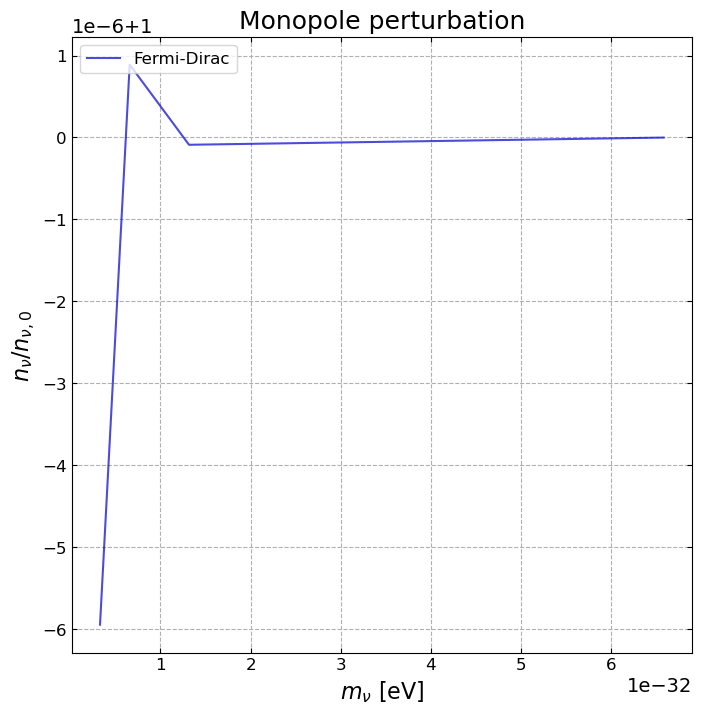

In [19]:
colors = ["mediumblue"]
labels = ["Fermi-Dirac"]

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_linear.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_linear.png"
]
number_densities_monopole_d = np.array(number_densities_monopole_d).reshape(1,4)
print(np.shape(number_densities_monopole_d))
print(np.shape(gammas))
eta = 4*1e-2
gammas = np.array([(1/0.1)*10**(-17)/s,(1/0.5)*10**(-17)/s,(1/1)*10**(-17)/s,(1/2)*10**(-17)/s])
SimPlot.overdensity_band_decay(
    dens_FD=np.array(number_densities_monopole_d),
    m_arr_FD=gammas,
    colors=colors,
    labels=labels,
    plot_xlims=None,
    plot_ylims=None,
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())

In [20]:
print(number_densities_monopole_p)

[Array(8.95384101e-08, dtype=float64), Array(3.53259909e-06, dtype=float64), Array(-3.16125311e-07, dtype=float64), Array(0.00012142, dtype=float64)]


ValueError: x and y must have same first dimension, but have shapes (4,) and (1, 4)

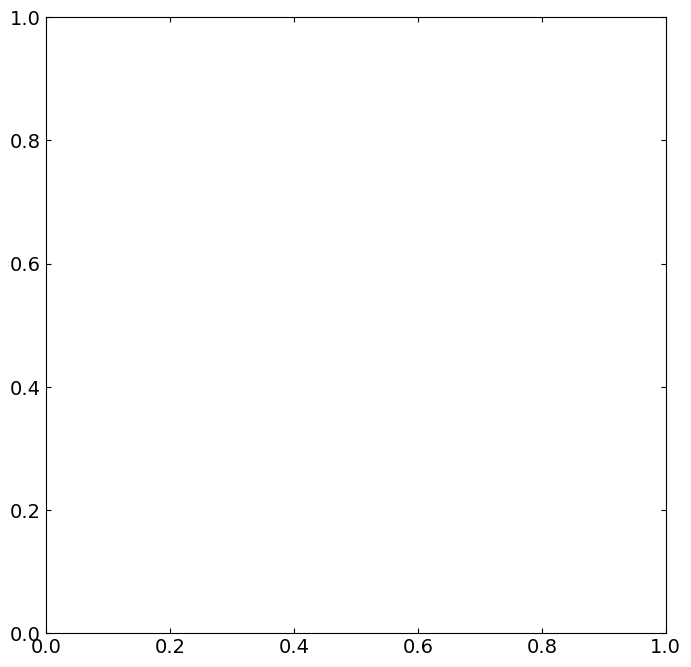

In [21]:
plt.plot(gammas,number_densities_monopole_d)
plt.xlabel('Lifetime, T = age of the universe')
plt.ylabel("$n_{1}$ $cm^{-3}$")
plt.title(r"$n_{1}$ at $z=z_{end}$ for different neutrino lifetimes")
#plt.ylim(56.6075,56.6100)

In [ ]:
print(number_densities_monopole_d)

[Array([0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.07370979,
       0.07370979, 0.07370979, 0.07370979, 0.07370979, 0.0737